Dask blog: https://towardsdatascience.com/trying-out-dask-dataframes-in-python-for-fast-data-analysis-in-parallel-aa960c18a915

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Dask

Dask is a flexible parallel computing library for analytic computing. Made to extend with numpy and pandas, its allows you scale up to “Big Data” collections like parallel arrays, dataframes, and lists.

_src: http://dask.pydata.org/en/latest/docs.html_

# Install dask

```pip install "dask[complete]"    # Install everything and just forget about trying to install each specification as a headache, unless you know your exact requirements.```

_src: http://dask.pydata.org/en/latest/install.html_

### Reading a dataframe (Pandas familiar syntax)

In [26]:
#here's how you load a pandas dataframe
import pandas as pd
df_p = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df_p.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
#here's the same in dask. Pretty familiar, right?
import dask.dataframe as dd
df_d = dd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
df_d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Write  a dataframe

In [28]:
#for the sake of loading the dataset again and again, let's just dump the csv somewhere
import os
if not os.path.isdir("./data/"): os.makedirs('./data/')

df_p.to_csv('data/iris.csv', index=False) #pandas

In [29]:
df_d.to_csv('./data/iris.csv') #There is no way to write a dask df in a single go. This will throw an error

NotADirectoryError: [Errno 20] Not a directory: '/home/kaveri/sem9/dev/erzalitorStuff/KerasUseCases/./data/iris.csv/0.part'

In [30]:
#dask methods

#Write a function to name multiple files that are written
def name(i): return 'iris_'+str(i)+'.csv'
df_d.to_csv('./data/myfiles-namedthisway-*.csv', name_function=name)

#Or just use a regex
df_d.to_csv('./data/myfiles-usingregex*.csv')

['./data/myfiles-usingregex0.csv']

Refer to this thread for more methods: https://github.com/dask/dask/issues/2656

The whole purpose was to benchmark the load times. Let's just use iris.csv for that

### Benchmark: Reading a csv

In [31]:
%time for i in range(1000): df_p = pd.read_csv('data/iris.csv')

CPU times: user 975 ms, sys: 10.1 ms, total: 985 ms
Wall time: 983 ms


In [32]:
%time for i in range(1000): df_d = dd.read_csv('data/iris.csv')

CPU times: user 2.95 s, sys: 55.3 ms, total: 3 s
Wall time: 3 s


In [34]:
df_d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa







  0%|          | 0/16 [00:00<?, ?it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  7.68it/s]





 67%|██████▋   | 2/3 [00:02<00:01,  1.20s/it]





100%|██████████| 3/3 [00:02<00:00,  1.11it/s]










  6%|▋         | 1/16 [00:02<00:42,  2.86s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  4.22it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.78it/s]





100%|██████████| 3/3 [00:01<00:00,  2.40it/s]










 12%|█▎        | 2/16 [00:04<00:29,  2.09s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  4.91it/s]





 67%|██████▋   | 2/3 [00:00<00:00,  2.50it/s]





100%|██████████| 3/3 [00:00<00:00,  3.02it/s]










 19%|█▉        | 3/16 [00:05<00:22,  1.74s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 67%|██████▋   | 2/3 [00:00<00:00,  2.67it/s]





100%|██████████| 3/3 [00:00<00:00,  3.24it/s]










 25%|██▌       | 4/16 [00:06<00:18,  1.55s

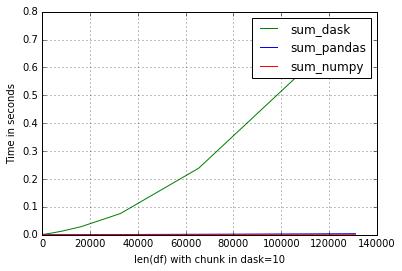






  0%|          | 0/16 [00:00<?, ?it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 67%|██████▋   | 2/3 [00:00<00:00, 17.83it/s]





100%|██████████| 3/3 [00:00<00:00, 12.07it/s]










  6%|▋         | 1/16 [00:00<00:03,  3.97it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.24it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.77it/s]





100%|██████████| 3/3 [00:01<00:00,  2.29it/s]










 12%|█▎        | 2/16 [00:01<00:10,  1.27it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.24it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.77it/s]





100%|██████████| 3/3 [00:01<00:00,  2.25it/s]










 19%|█▉        | 3/16 [00:02<00:12,  1.03it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.54it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.79it/s]





100%|██████████| 3/3 [00:01<00:00,  2.37it/s]










 25%|██▌       | 4/16 [00:04<00:12,  1.04s

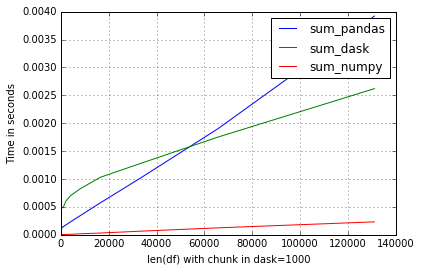






  0%|          | 0/16 [00:00<?, ?it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.06it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.66it/s]





100%|██████████| 3/3 [00:01<00:00,  2.19it/s]










  6%|▋         | 1/16 [00:01<00:20,  1.38s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:01,  1.81it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.60it/s]





100%|██████████| 3/3 [00:01<00:00,  2.05it/s]










 12%|█▎        | 2/16 [00:02<00:19,  1.42s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.20it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.59it/s]





100%|██████████| 3/3 [00:01<00:00,  2.21it/s]




 19%|█▉        | 3/16 [00:04<00:18,  1.40s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  3.43it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.93it/s]





100%|██████████| 3/3 [00:01<00:00,  2.46it/s]









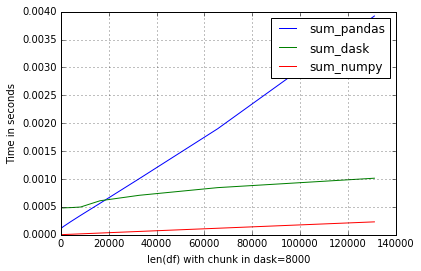






  0%|          | 0/16 [00:00<?, ?it/s]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.62it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.89it/s]





100%|██████████| 3/3 [00:01<00:00,  2.40it/s]










  6%|▋         | 1/16 [00:01<00:18,  1.27s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.44it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.84it/s]





100%|██████████| 3/3 [00:01<00:00,  2.32it/s]










 12%|█▎        | 2/16 [00:02<00:17,  1.28s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:00,  2.24it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.80it/s]





100%|██████████| 3/3 [00:01<00:00,  2.30it/s]










 19%|█▉        | 3/16 [00:03<00:16,  1.29s/it]





  0%|          | 0/3 [00:00<?, ?it/s]





 33%|███▎      | 1/3 [00:00<00:01,  1.99it/s]





 67%|██████▋   | 2/3 [00:01<00:00,  1.74it/s]





100%|██████████| 3/3 [00:01<00:00,  2.24it/s]



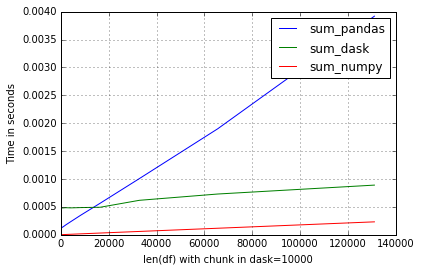

In [171]:
def make_pandas(n):
    df = pd.DataFrame(np.random.randint(10, size=(n, 3)))
    return df

def make_dask(n, c):
    df = da.from_array(np.random.randint(10, size=(n, 3)), chunks=c)
    return df

def make_numpy(n):
    return np.random.randint(10, size=(n, 3))

def sum_pandas(x): return x[0].sum()
def sum_dask(x): return x[1].sum()
def sum_numpy(x): return x[2].sum()

for c in [10, 1000, 8000, 10000]:
    perfplot.show(
        setup=lambda n: [make_pandas(n), make_dask(n, c), make_numpy(n)],
        kernels=[sum_pandas, sum_dask, sum_numpy],
        n_range=[2**k for k in range(2, 18)],
        equality_check=False,
        xlabel='len(df) with chunk in dask='+str(c))

When there is next to zero parallisation, i.e., just ten chunks, the overheads involved in dask make handling it much more expensive than simpler pandas and numpy arrays. But as <b>chunk</b> size increases, dask is able to catch upto pandas.

With the size of the dataframe, dask needed just (60000, 3) and (20000, 3) <b>sized matrices</b> (with chunksize=1000 and 8000 respectively) to overcome pandas.

Numpy has no initialisation overheads and is negligible as compared to pandas and dask. But as size increases exponentially, dask should be able to catch up with the other two. 

In [122]:
# from sklearn.datasets import load_iris
# iris = load_iris()
# X = iris.data[:, :]
# y = iris.target[:]
# df_n = np.column_stack([X, y1]) #technically not a dataframe
# df_n

array([[ 5.1,  3.5,  1.4,  0.2,  0. ],
       [ 4.9,  3. ,  1.4,  0.2,  0. ],
       [ 4.7,  3.2,  1.3,  0.2,  0. ],
       [ 4.6,  3.1,  1.5,  0.2,  0. ],
       [ 5. ,  3.6,  1.4,  0.2,  0. ],
       [ 5.4,  3.9,  1.7,  0.4,  0. ],
       [ 4.6,  3.4,  1.4,  0.3,  0. ],
       [ 5. ,  3.4,  1.5,  0.2,  0. ],
       [ 4.4,  2.9,  1.4,  0.2,  0. ],
       [ 4.9,  3.1,  1.5,  0.1,  0. ],
       [ 5.4,  3.7,  1.5,  0.2,  0. ],
       [ 4.8,  3.4,  1.6,  0.2,  0. ],
       [ 4.8,  3. ,  1.4,  0.1,  0. ],
       [ 4.3,  3. ,  1.1,  0.1,  0. ],
       [ 5.8,  4. ,  1.2,  0.2,  0. ],
       [ 5.7,  4.4,  1.5,  0.4,  0. ],
       [ 5.4,  3.9,  1.3,  0.4,  0. ],
       [ 5.1,  3.5,  1.4,  0.3,  0. ],
       [ 5.7,  3.8,  1.7,  0.3,  0. ],
       [ 5.1,  3.8,  1.5,  0.3,  0. ],
       [ 5.4,  3.4,  1.7,  0.2,  0. ],
       [ 5.1,  3.7,  1.5,  0.4,  0. ],
       [ 4.6,  3.6,  1. ,  0.2,  0. ],
       [ 5.1,  3.3,  1.7,  0.5,  0. ],
       [ 4.8,  3.4,  1.9,  0.2,  0. ],
       [ 5. ,  3. ,  1.6,